In [88]:
!pip install numpy pandas matplotlib seaborn

In [4]:
Looking at f1 score + more things aspects of the model that can be measure, binning the data (change all the data to positive and negative)
+ logistic regression and looking at the coefficients

SyntaxError: invalid syntax (2057201928.py, line 1)

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("Downloads/archive/games.csv")

In [91]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [92]:
df.dtypes

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object

In [93]:
df = df.drop('title', axis='columns')

In [94]:
df = df.drop('app_id', axis='columns')

In [95]:
df = df.drop('positive_ratio', axis='columns')

In [96]:
#df['date_release'] = pd.to_datetime(df['date'])

# Extract year, month, and day
#df['year'] = df['date_release'].dt.year
#df['month'] = df['date_release'].dt.month
#df['day'] = df['date_release'].dt.day

In [97]:
df = df.drop('date_release', axis='columns')

In [98]:
df

,win,mac,linux,rating,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,Very Positive,2199,9.99,9.99,0.0,True
1,True,False,False,Positive,21,2.99,2.99,0.0,True
2,True,True,True,Very Positive,3722,14.99,14.99,0.0,True
3,True,False,False,Mixed,873,14.99,14.99,0.0,True
4,True,True,False,Very Positive,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50867,True,False,False,Very Positive,101,22.00,0.00,0.0,True
50868,True,False,False,Mostly Negative,29458,40.00,0.00,0.0,True
50869,True,False,False,Very Positive,1128,30.00,0.00,0.0,True
50870,True,False,False,Very Positive,82,17.00,0.00,0.0,True


In [99]:
df = df.replace("Very Positive", "Positive")

In [100]:
df = df.replace("Mostly Positive", "Positive")

In [101]:
df = df.replace("Overwhelmingly Positive rating", "Positive")

In [102]:
df = df.replace("Overwhelmingly Positive", "Positive")

In [103]:
df = df.replace("Very Negative", "Negative")

In [104]:
df = df.replace("Overwhelmingly Negative", "Negative")

In [105]:
df = df.replace("Mostly Negative", "Negative")

In [106]:
df

,win,mac,linux,rating,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,Positive,2199,9.99,9.99,0.0,True
1,True,False,False,Positive,21,2.99,2.99,0.0,True
2,True,True,True,Positive,3722,14.99,14.99,0.0,True
3,True,False,False,Mixed,873,14.99,14.99,0.0,True
4,True,True,False,Positive,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50867,True,False,False,Positive,101,22.00,0.00,0.0,True
50868,True,False,False,Negative,29458,40.00,0.00,0.0,True
50869,True,False,False,Positive,1128,30.00,0.00,0.0,True
50870,True,False,False,Positive,82,17.00,0.00,0.0,True


In [107]:
mixedRating = (df['rating'] == 'Mixed')

In [108]:
df = df[~mixedRating]

In [109]:
df

,win,mac,linux,rating,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,Positive,2199,9.99,9.99,0.0,True
1,True,False,False,Positive,21,2.99,2.99,0.0,True
2,True,True,True,Positive,3722,14.99,14.99,0.0,True
4,True,True,False,Positive,8784,11.99,11.99,0.0,True
5,True,False,False,Positive,5579,7.99,7.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50867,True,False,False,Positive,101,22.00,0.00,0.0,True
50868,True,False,False,Negative,29458,40.00,0.00,0.0,True
50869,True,False,False,Positive,1128,30.00,0.00,0.0,True
50870,True,False,False,Positive,82,17.00,0.00,0.0,True


In [110]:
X = df.drop(columns = ['rating'])
y = df['rating']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2 ) #80% train, 20% test

In [113]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (30972, 8)
X_test (7743, 8)
y_train (30972,)
y_test (7743,)


In [114]:
from sklearn import tree

In [115]:
clf = tree.DecisionTreeClassifier() #instantiate Decision Tree class

In [116]:
clf = clf.fit(X_train, y_train) #fit training data to the model

In [117]:
predicted = clf.predict(X_test)

In [118]:
predicted

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [119]:
clf.score(X_test, y_test)

0.9182487407981402

In [120]:
fi = clf.feature_importances_ 
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending=False, inplace=True)

/var/folders/jv/9vwvk0dd59bdfshh1lp_mf8m0000gn/T/ipykernel_62577/2181920530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
/var/folders/jv/9vwvk0dd59bdfshh1lp_mf8m0000gn/T/ipykernel_62577/2181920530.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


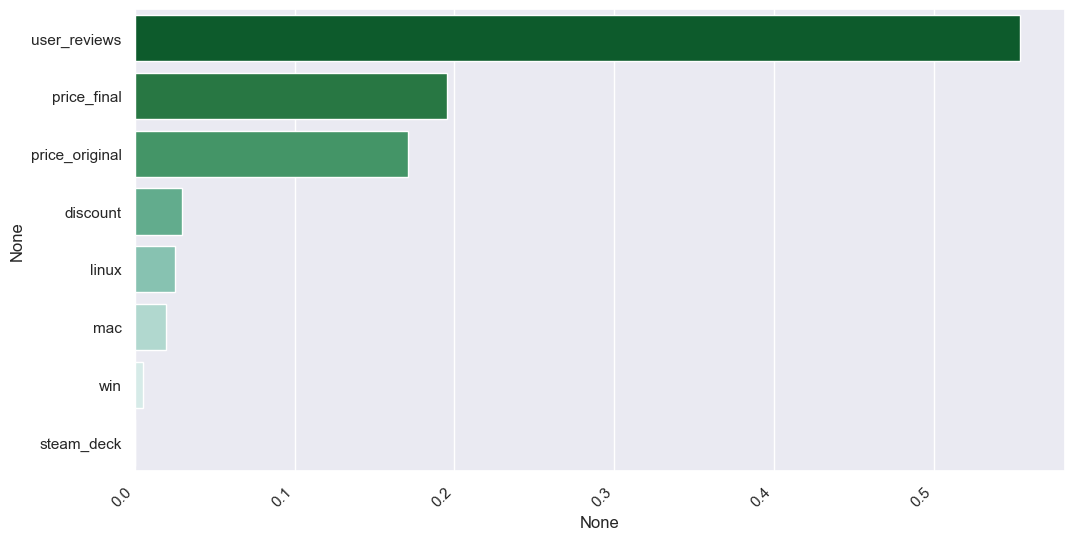

<Figure size 1800x1000 with 0 Axes>

In [121]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

plt.savefig("featureimportance.png")

In [83]:
from sklearn import metrics

In [84]:
predicted = clf.predict(X_test)

In [85]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

    Negative       0.07      0.03      0.05       445
    Positive       0.94      0.97      0.96      7298

    accuracy                           0.92      7743
   macro avg       0.51      0.50      0.50      7743
weighted avg       0.89      0.92      0.91      7743



In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
confusion_matrix(y_test, predicted)

array([[  15,  430],
       [ 191, 7107]])

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
,df

,win,mac,linux,rating,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,Positive,2199,9.99,9.99,0.0,True
1,True,False,False,Positive,21,2.99,2.99,0.0,True
2,True,True,True,Positive,3722,14.99,14.99,0.0,True
3,True,False,False,Mixed,873,14.99,14.99,0.0,True
4,True,True,False,Positive,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50867,True,False,False,Positive,101,22.00,0.00,0.0,True
50868,True,False,False,Negative,29458,40.00,0.00,0.0,True
50869,True,False,False,Positive,1128,30.00,0.00,0.0,True
50870,True,False,False,Positive,82,17.00,0.00,0.0,True


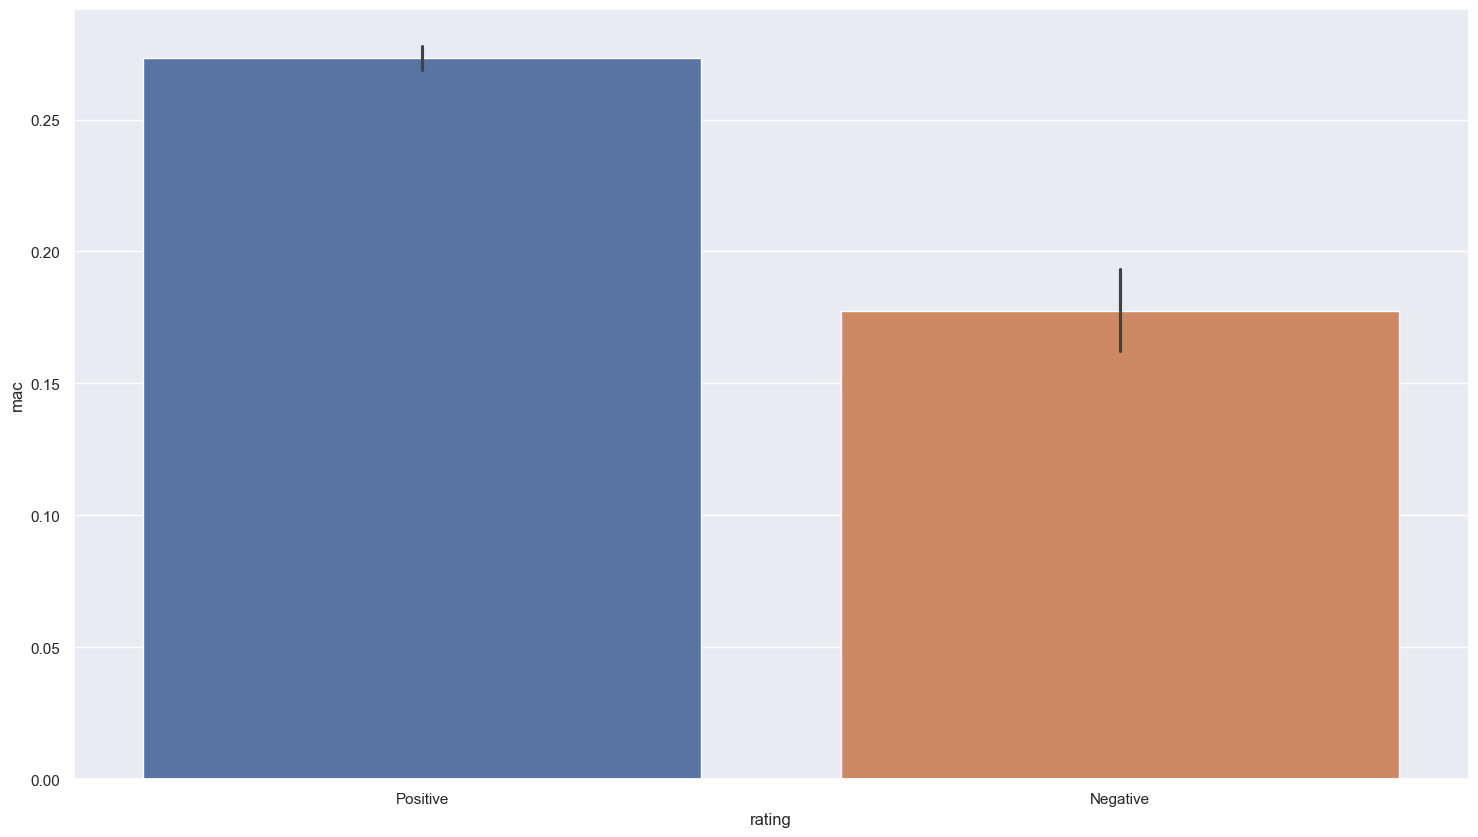

In [70]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'mac', hue = 'rating')

plt.savefig("binnedgraph2.png")

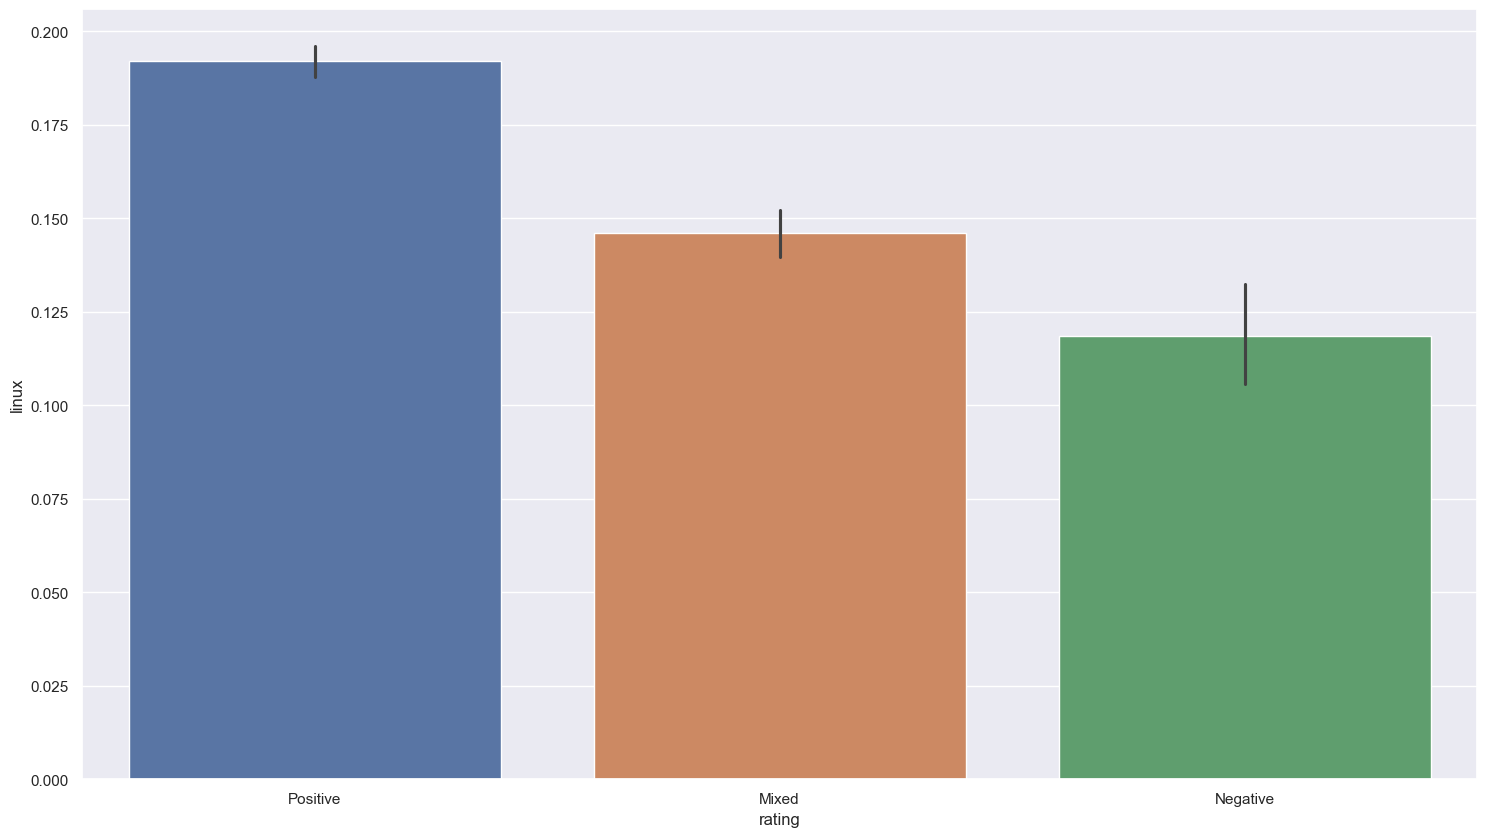

In [45]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'linux', hue = 'rating')

plt.savefig("linuxrating.png")

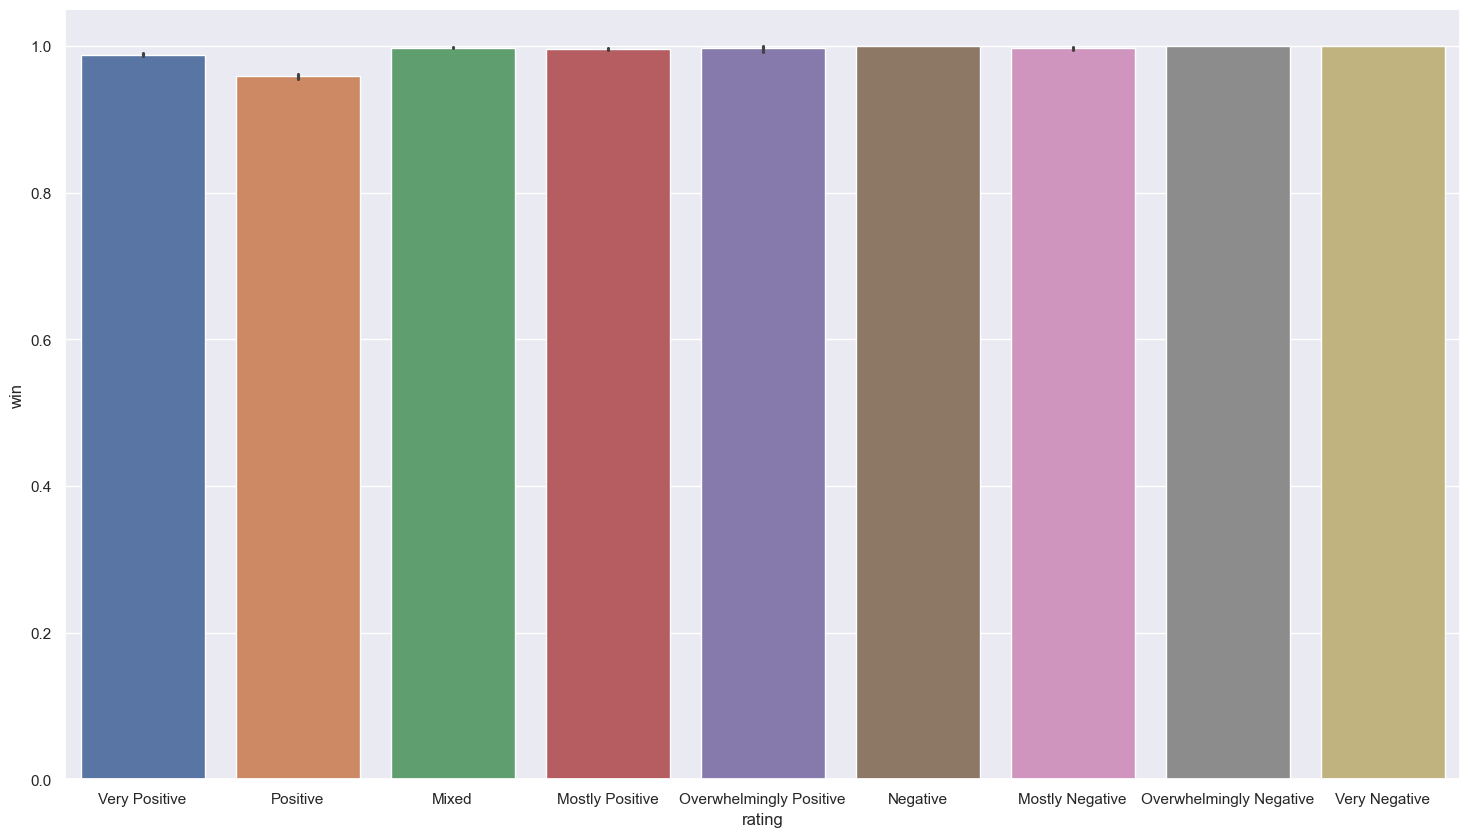

In [57]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'win', hue = 'rating')

plt.savefig("winrating.png")

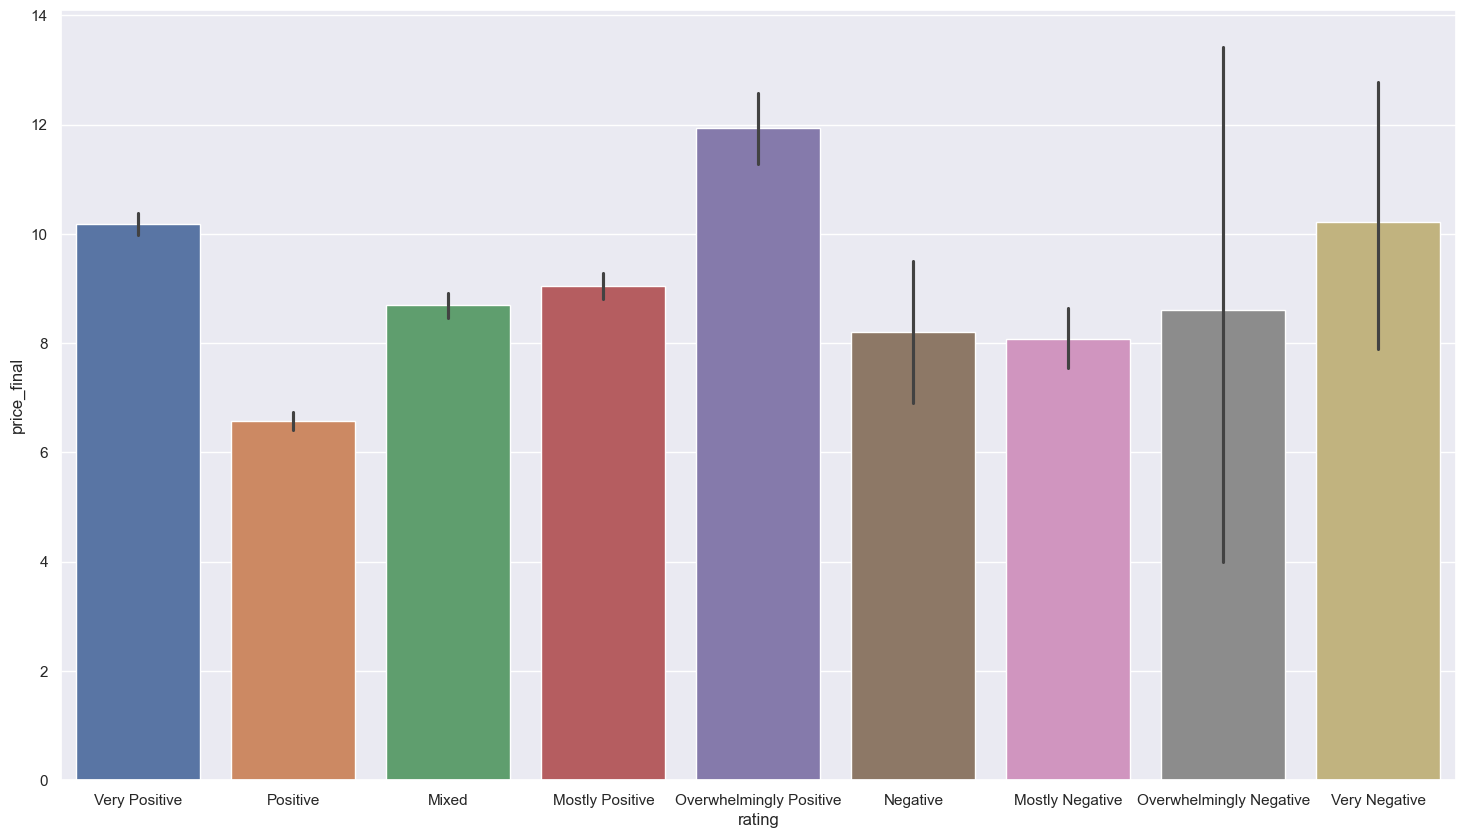

In [54]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'price_final', hue = 'rating')

plt.savefig("finalprice.png")

In [50]:
df

,win,mac,linux,rating,user_reviews,price_final,price_original,discount,steam_deck
0,True,False,False,Very Positive,2199,9.99,9.99,0.0,True
1,True,False,False,Positive,21,2.99,2.99,0.0,True
2,True,True,True,Very Positive,3722,14.99,14.99,0.0,True
3,True,False,False,Mixed,873,14.99,14.99,0.0,True
4,True,True,False,Very Positive,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...
50867,True,False,False,Very Positive,101,22.00,0.00,0.0,True
50868,True,False,False,Mostly Negative,29458,40.00,0.00,0.0,True
50869,True,False,False,Very Positive,1128,30.00,0.00,0.0,True
50870,True,False,False,Very Positive,82,17.00,0.00,0.0,True


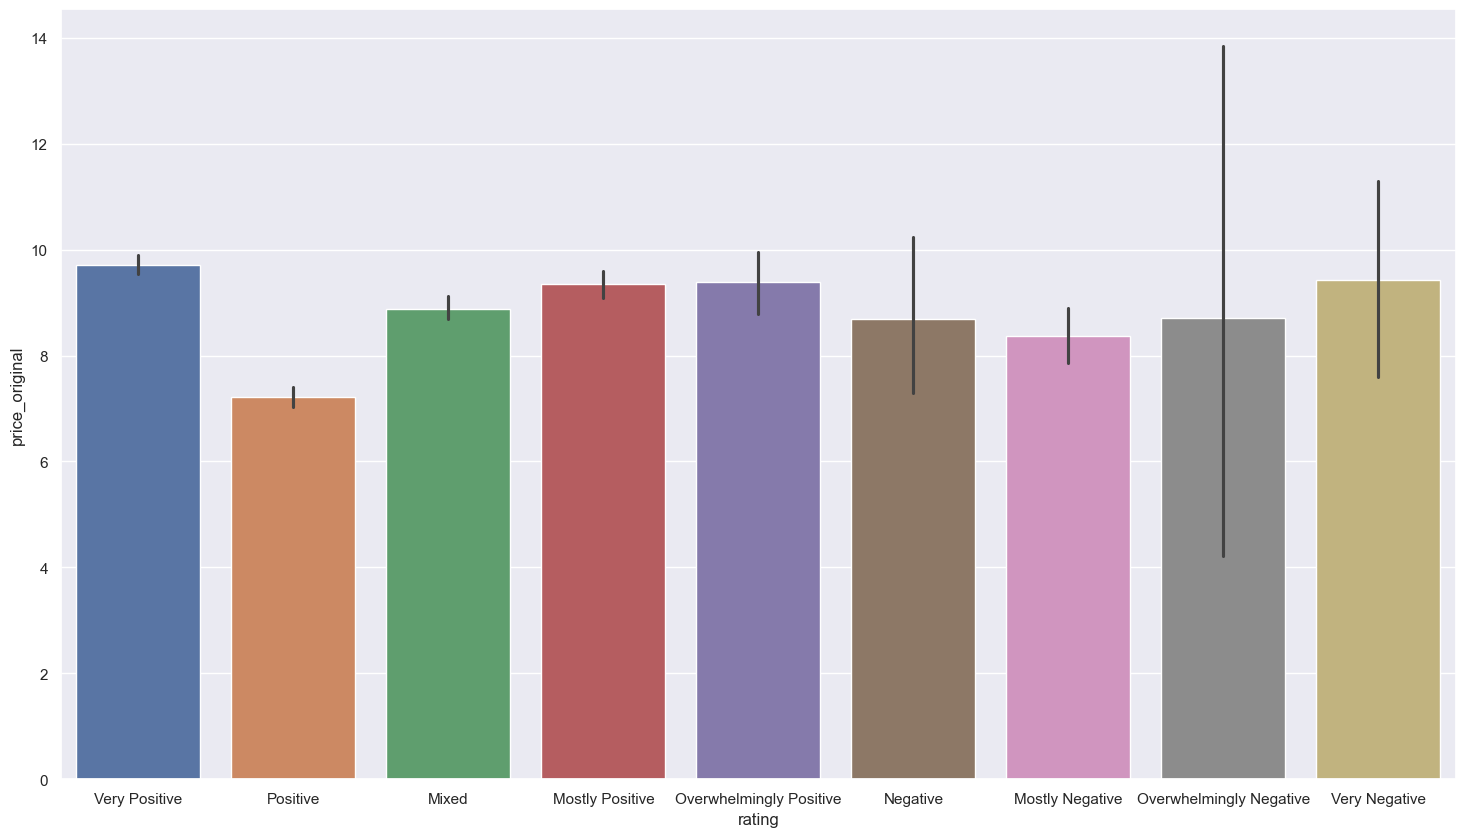

In [53]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'price_original', hue = 'rating')

plt.savefig("priceoriginal.png")

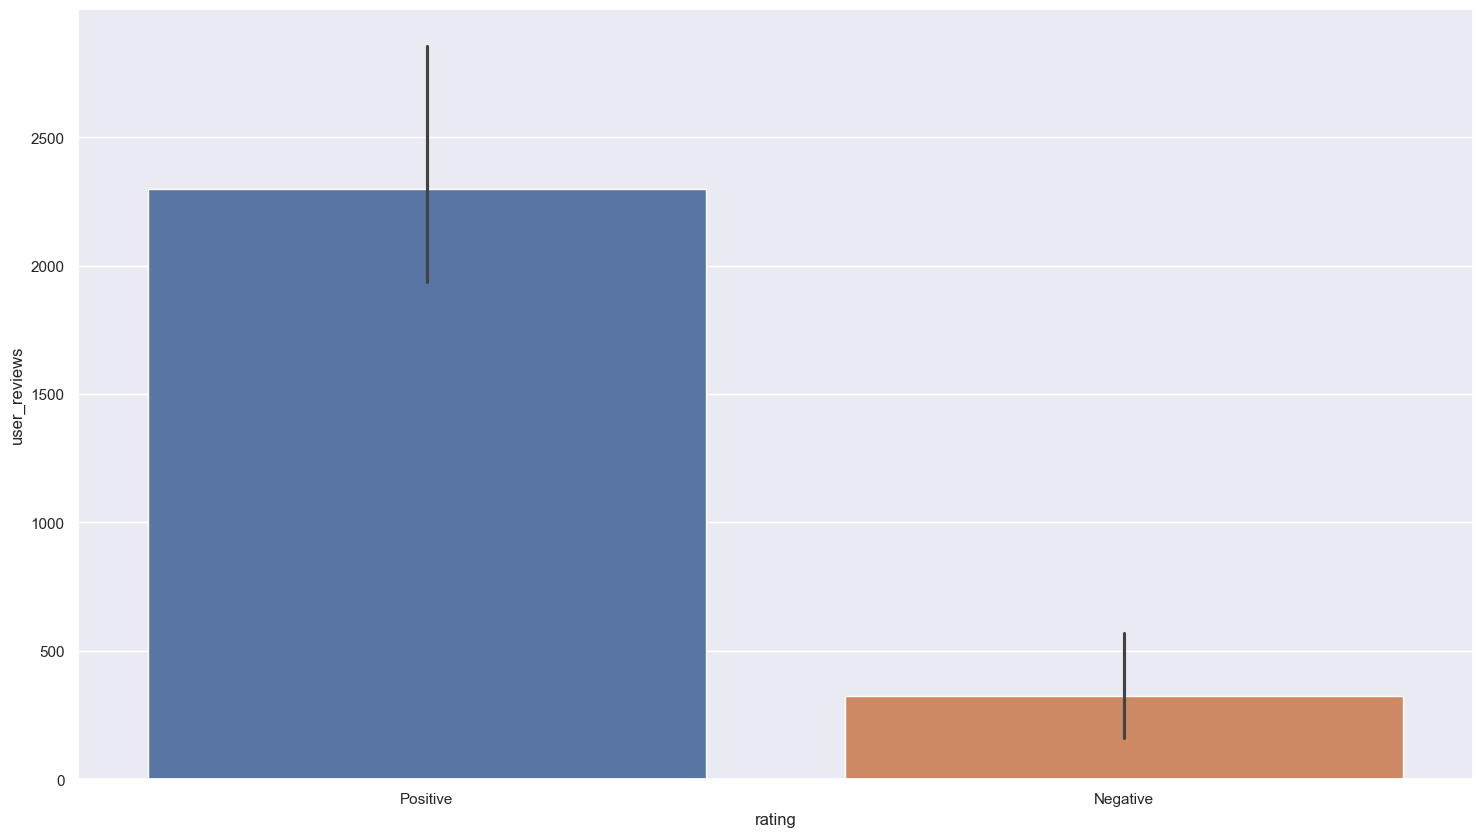

In [122]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'user_reviews', hue = 'rating')

plt.savefig("user_reviews.png")

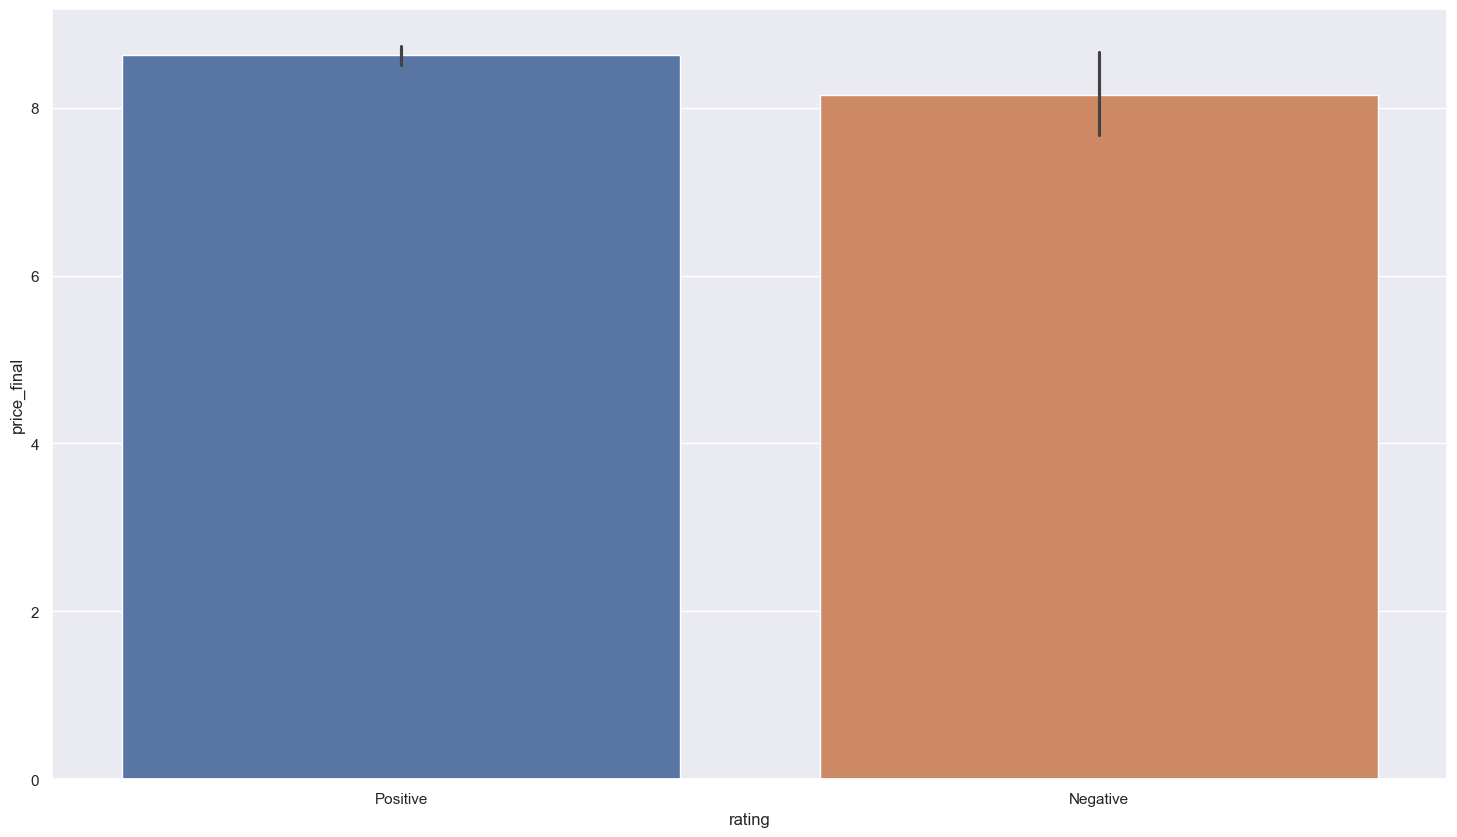

In [123]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'price_final', hue = 'rating')

plt.savefig("binnedfinalprice.png")

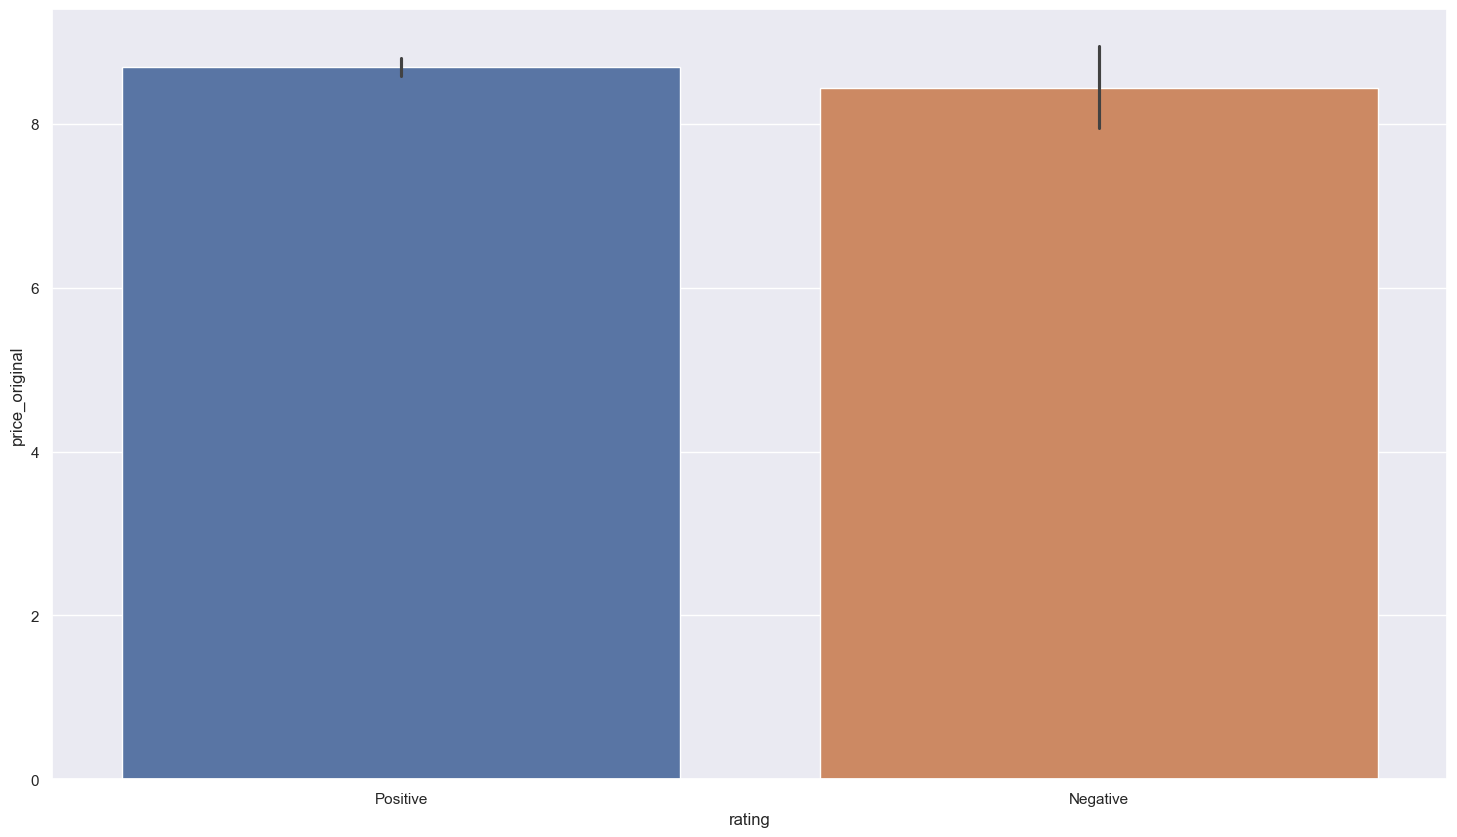

In [124]:
sns.set(rc={"figure.figsize":(18, 10)})
sns.barplot(data=df, x = 'rating', y = 'price_original', hue = 'rating')

plt.savefig("binnedoriginalprice.png")

In [ ]:
For the next two experiments I will focus on dimensionality reduction to make the dataset more compact and smaller which will fit the model
a lot better and will increase the accuracy score